# Linear Algebra - Week 1

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

plt.style.use("seaborn-v0_8-whitegrid")

## Singularity

| Complete | Redundant | Contradictory |
|---|---|---|
| $\begin{cases} a + b = 10  \\ a + 2b = 12 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 20 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 24 \end{cases}$ |

The first system is complete (non-singular) because it has one solution. $a=8$ and $b=2$.

The second system is redundant (singular) because it has many solutions. Any $a$ and $b$ whose sum is 10.

The second system is contradictory (singular) because it has no solutions. No $a+b$ can be equal to 10 while $2(a+b)$ not being 20.

> 🔑 **Singular:** peculiar, irregular

> 🔑 **Non-singular:** regular

### Singularity and linear dependency

A system of equations can also be represented as lines.

In a non-singular system the lines will intersect at the solution.

In a singular (redundant) system the lines will be one over the other (ie parallel with distant zero).

In a singular (contradictory) system the lines will be parallel and distant from each other.

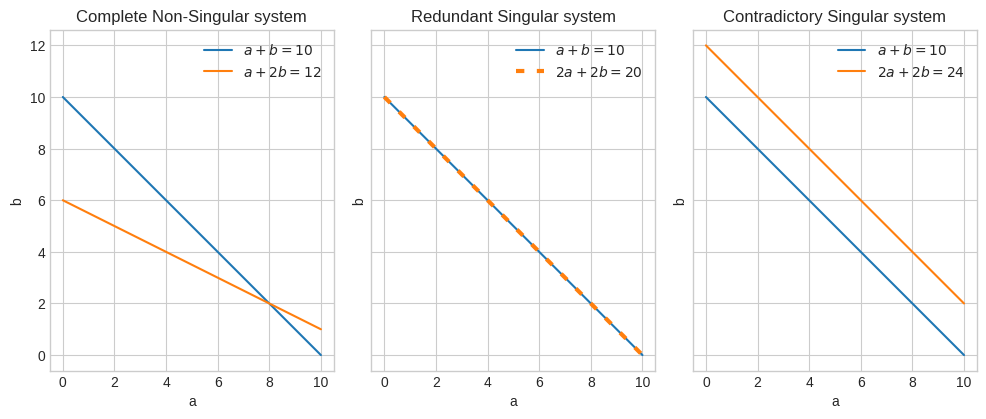

In [2]:
def line1(a):
    return 10.0 - a


def line2(a):
    return 6.0 - (0.5) * a


def line3(a):
    return (20.0 - 2.0 * a) / 2


def line4(a):
    return 12.0 - a


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

ax1.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax1.plot([0.0, 10.0], [line2(0.0), line2(10.0)], label="$a+2b=12$")
ax1.set_ylabel("b")
ax1.set_xlabel("a")
ax1.legend()
ax1.set_title("Complete Non-Singular system")
ax1.set_aspect("equal")

ax2.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax2.plot(
    [0.0, 10.0],
    [line3(0.0), line3(10.0)],
    dashes=[2, 3],
    linewidth="3",
    label="$2a+2b=20$",
)
ax2.set_ylabel("b")
ax2.set_xlabel("a")
ax2.legend()
ax2.set_title("Redundant Singular system")
ax2.set_aspect("equal")

ax3.plot([0.0, 10.0], [line1(0.0), line1(10.0)], label="$a+b=10$")
ax3.plot([0.0, 10.0], [line4(0.0), line4(10.0)], label="$2a+2b=24$")
ax3.set_ylabel("b")
ax3.set_xlabel("a")
ax3.legend()
ax3.set_title("Contradictory Singular system")
ax3.set_aspect("equal")

plt.tight_layout()
plt.show()

It turns out that to distinguish between singular and non-singular, the constants can be removed.

| Complete | Redundant | Contradictory |
|---|---|---|
| $\begin{cases} a + b = 10  \\ a + 2b = 12 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 20 \end{cases}$ | $\begin{cases} a + b = 10  \\ 2a + 2b = 24 \end{cases}$ |

Becomes

| Non-Singular | Singular |
|---|---|
| $\begin{cases} a + b = 0 \\ a + 2b = 0 \end{cases}$ | $\begin{cases} a + b = 0 \\ 2a + 2b = 0 \end{cases}$ |

And this is where the notion of **Non-singular** and **Singular** matrices comes in.

| Non-Singular | Singular |
|---|---|
| $\begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$ $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ | $\begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix}$ $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ |

<p>&nbsp;</p>

> 🔑 **Singular**: the rows are linearly dependent

> 🔑 **Non-singular**: the rows are linearly independent

When the rows are linearly independent, there is no constant you can multiply a row by to obtain the second row. 

A different interpretation is that each row carries new information that we cannot derive from any other rows.

In contrast, the information provided by the rows of a singular matrix are either redundant or contradictory.

### Singularity and the determinant

> 🔑 **Singular**: determinant is zero

> 🔑 **Non-singular**: determinant is non-zero

To see how we get to the formula for the determinant and why it's 0 for singular matrices, let's consider the matrix $A$.

$A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$

We saw earlier that $A$ is singular if $(a+b)k = c+d$ for $k > 0$ (linear dependency).

In particular we saw $\begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix}$ is singular because $(1+1)k = 2+2$ for $k=2$.

Equivalently

$A = 
\begin{cases}
ax + by = 0 \\
cx + dy = 0
\end{cases}$

$=\begin{cases}
k_1ax = cx \\
k_2by = dy
\end{cases}$

$=\begin{cases}
k_1 = \cfrac{c}{a} \\
k_2 = \cfrac{d}{b}
\end{cases}$

If $k_1 = k_2 = k > 0$, we obtain

$\cfrac{c}{a} = \cfrac{d}{b}$

We get rid of the fractions and we obtain the formula of the determinant of $A$

$\det A = ad - bc$

$A$ is singular if $ad - bc$ is 0, which implies that $k > 0$

The determinant has the following properties.

> 🔑 $\det A \times \det B = \det AB$

> 🔑 $\det A^{-1} = \cfrac{1}{\det A}$

The second one actually can be derived from the first property.

$\det AA^{-1} = \det A \times \det A^{-1}$

$\det I = \det A \times \det A^{-1}$

$\cfrac{\det I}{\det A} = \det A^{-1}$

$\cfrac{1}{\det A} = \det A^{-1}$

Let's verify the first property, the second property and also that $\det I = 1$

In [3]:
A = np.array([[5, 3], [2, 1]])
B = np.array([[1, -1], [3, 4]])

assert np.isclose(np.linalg.det(A) * np.linalg.det(B), np.linalg.det(np.matmul(A, B)))
assert np.isclose(np.linalg.det(np.linalg.inv(A)), 1 / np.linalg.det(A))
assert np.isclose(np.linalg.det(np.linalg.inv(B)), 1 / np.linalg.det(B))
assert np.linalg.det(np.identity(2)) == 1.0

### Singularity and rank

We can think the rank of a matrix in terms of how non-singular a matrix is.

A 2-D matrix has solution in a 2-D space.

When a matrix is non-singular, we get a point as the solution; and since a point has 0 dimensions, the rank is 2. 

When a matrix is singular, we get a line as the solution or the whole space. A line has dimension 1 and the whole space has dimension 2, so the rank is 1 and 0, respectively.

Similarly to what we saw for the determinant of matrix, the rank relates to the amount of linearly independent rows of a matrix.

> 🔑 The rank of a matrix is the number of linearly independent rows

Although this can help develop an intuition of what the rank of a matrix represents, it doesn't help determine it, especially for large matrices or non-obvious linear dependencies.

One method to determine the rank of a matrix is through the reduced row-echelon form (rref) of a matrix.

Let's consider the matrix

$\begin{bmatrix}5&&1\\4&&-3\end{bmatrix}$

We can obtain the row echelon form via row operations:
- switching any two rows
- multiplying (dividing) a row by a non-zero constant
- adding (subtracting) one row to another

Row operations are such that they don't alter the singularity or non-singularity of a matrix, nor its rank.

1. Divide each row by the leftmost non-zero coefficient

$\begin{bmatrix}1&&\cfrac{1}{5}\\1&&-\cfrac{3}{4}\end{bmatrix}$

2. Subtract the first row from the second row

$\begin{bmatrix}1&&\cfrac{1}{5}\\0&&-\cfrac{3}{4}-\cfrac{1}{5}\end{bmatrix}$

3. Divide the last row by the leftmost non-zero coefficient

$\begin{bmatrix}1&&\cfrac{1}{5}\\0&&1\end{bmatrix}$

4. Multiply the second row by $\cfrac{1}{5}$ and subtract it from the first row

$\begin{bmatrix}1&&0\\0&&1\end{bmatrix}$

Or we can use the `rref` method of the `Matrix` data structure from the `sp` package.

In [4]:
sp.Matrix([[5, 1], [1, -3]]).rref(pivots=False)

Matrix([
[1, 0],
[0, 1]])

Let's try to calculate the rref of a singular matrix: a 3x3 matrix where **all** rows are linearly dependent.

In [5]:
sp.Matrix([[1, 2, 3], [3, 6, 9], [2, 4, 6]]).rref(pivots=False)

Matrix([
[1, 2, 3],
[0, 0, 0],
[0, 0, 0]])

Let's try another singular matrix, where only 2 rows are linearly dependent.

In [6]:
sp.Matrix([[1, 2, 3], [3, 6, 9], [1, 2, 4]]).rref(pivots=False)

Matrix([
[1, 2, 0],
[0, 0, 1],
[0, 0, 0]])

The rref form is characterized by the presence of pivots.

> 🔑 A pivot is the first non-zero entry of each row in a row-echelon form.

And it turns out the pivots help us determine the rank of a matrix.

> 🔑 The rank of a matrix is the number of pivots of its row-echelon form